In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

In [49]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.300,31
1,tt10384606,8.900,559
2,tt1042974,6.400,20
3,tt1043726,4.200,50352
4,tt1060240,6.500,21


In [4]:
imdb_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [55]:
imdb_name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [56]:
imdb_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [78]:
imdb_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.000
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.000
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.000
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.000
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.000


In [6]:
us_akas = imdb_akas_df[imdb_akas_df['region'] == 'US']

In [41]:
len(us_akas)

51490

In [44]:
us_akas = us_akas.drop_duplicates(subset=['title_id'])

In [46]:
len(us_akas)

47433

In [50]:
test = us_akas.join(imdb_ratings_df.set_index('tconst'), on='title_id')
test2 = test[['title_id', 'title', 'attributes', 'averagerating', 'numvotes']]
test2.head()

,title_id,title,attributes,averagerating,numvotes
12,tt0369610,Jurassic World 3D,3-D version,7.000,539338.000
50,tt0401729,John Carter of Mars,NaN,6.600,241792.000
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,IMAX version,6.500,358813.000
152,tt10379338,Guys Night Out,NaN,NaN,NaN
157,tt10446418,The Icon,NaN,NaN,NaN


In [52]:
dir_prin = imdb_principals_df[imdb_principals_df['category'] == 'director']

test3 = test2.join(dir_prin.set_index('tconst'), on='title_id')
test3.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters
12,tt0369610,Jurassic World 3D,3-D version,7.000,539338.000,5.000,nm1119880,director,NaN,NaN
50,tt0401729,John Carter of Mars,NaN,6.600,241792.000,5.000,nm0004056,director,NaN,NaN
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,IMAX version,6.500,358813.000,5.000,nm0000318,director,NaN,NaN
152,tt10379338,Guys Night Out,NaN,NaN,NaN,3.000,nm2584377,director,NaN,NaN
157,tt10446418,The Icon,NaN,NaN,NaN,1.000,nm4270970,director,NaN,NaN


In [57]:
test4 = test3.join(imdb_name_df.set_index('nconst'), on='nconst')
test4.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
12,tt0369610,Jurassic World 3D,3-D version,7.000,539338.000,5.000,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.000,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
50,tt0401729,John Carter of Mars,NaN,6.600,241792.000,5.000,nm0004056,director,NaN,NaN,Andrew Stanton,1965.000,NaN,"writer,actor,producer","tt0120623,tt0266543,tt2277860,tt0910970"
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,IMAX version,6.500,358813.000,5.000,nm0000318,director,NaN,NaN,Tim Burton,1958.000,NaN,"producer,miscellaneous,director","tt0099487,tt0109707,tt0121164,tt0408236"
152,tt10379338,Guys Night Out,NaN,NaN,NaN,3.000,nm2584377,director,NaN,NaN,Arthur Muhammad,NaN,NaN,"director,editor,producer","tt0165832,tt2441402,tt3735398,tt1336012"
157,tt10446418,The Icon,NaN,NaN,NaN,1.000,nm4270970,director,NaN,NaN,Nenad Ilic,NaN,NaN,"director,writer","tt10446418,tt1820388,tt2427830"


In [58]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000,664300000,2010
3,Inception,WB,292600000.000,535700000,2010
4,Shrek Forever After,P/DW,238700000.000,513900000,2010


In [59]:
test5 = test4.join(movie_gross_df.set_index('title'), on='title')
test5.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,studio,domestic_gross,foreign_gross,year
12,tt0369610,Jurassic World 3D,3-D version,7.000,539338.000,5.000,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.000,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",NaN,NaN,NaN,NaN
50,tt0401729,John Carter of Mars,NaN,6.600,241792.000,5.000,nm0004056,director,NaN,NaN,Andrew Stanton,1965.000,NaN,"writer,actor,producer","tt0120623,tt0266543,tt2277860,tt0910970",NaN,NaN,NaN,NaN
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,IMAX version,6.500,358813.000,5.000,nm0000318,director,NaN,NaN,Tim Burton,1958.000,NaN,"producer,miscellaneous,director","tt0099487,tt0109707,tt0121164,tt0408236",NaN,NaN,NaN,NaN
152,tt10379338,Guys Night Out,NaN,NaN,NaN,3.000,nm2584377,director,NaN,NaN,Arthur Muhammad,NaN,NaN,"director,editor,producer","tt0165832,tt2441402,tt3735398,tt1336012",NaN,NaN,NaN,NaN
157,tt10446418,The Icon,NaN,NaN,NaN,1.000,nm4270970,director,NaN,NaN,Nenad Ilic,NaN,NaN,"director,writer","tt10446418,tt1820388,tt2427830",NaN,NaN,NaN,NaN


In [60]:
test5['foreign_gross'] = test5['foreign_gross'].str.replace(',', '').apply(lambda x: float(x))

In [14]:
# test5['foreign_gross'] = test5['foreign_gross'].apply(lambda s: float(x))

In [63]:
test5['worldwide_gross'] = test5['domestic_gross'] + test5['foreign_gross']
test5['worldwide_gross'].value_counts()

18100000.000     15
2584000.000       9
14400000.000      7
43000000.000      6
484600000.000     5
                 ..
21100000.000      1
854000000.000     1
299300000.000     1
221600000.000     1
21776000.000      1
Name: worldwide_gross, Length: 811, dtype: int64

In [62]:
test5[['primary_name','worldwide_gross' ]].isna().value_counts()

primary_name  worldwide_gross
False         True               45768
True          True                6455
False         False               1118
True          False                 62
dtype: int64

In [64]:
test6 = test5.dropna(subset=['primary_name','worldwide_gross'])
test6['primary_name'].value_counts()

Clint Eastwood           6
Lasse Hallström          5
Tim Story                5
Jason Reitman            4
David O. Russell         4
                        ..
Matt Bettinelli-Olpin    1
David Ayer               1
Scott Nelson             1
Gastón Solnicki          1
Chris Wedge              1
Name: primary_name, Length: 866, dtype: int64

In [155]:
test6.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,studio,domestic_gross,foreign_gross,year,worldwide_gross
271,tt1223236,African Cats,NaN,7.600,5784.000,4.000,nm0774582,director,NaN,NaN,Keith Scholey,NaN,NaN,"producer,director,writer","tt6332994,tt10055028,tt0123360,tt1223236",BV,15400000.000,15400000.000,2011.000,30800000.000
271,tt1223236,African Cats,NaN,7.600,5784.000,5.000,nm0288144,director,co-director,NaN,Alastair Fothergill,1960.000,NaN,"producer,director,writer","tt1222815,tt0296310,tt0795176,tt0146386",BV,15400000.000,15400000.000,2011.000,30800000.000
563,tt1343727,Dredd,NaN,7.100,234616.000,5.000,nm0871428,director,NaN,NaN,Pete Travis,NaN,NaN,"director,writer","tt0443274,tt0408056,tt2515034,tt1343727",LGF,13400000.000,22200000.000,2012.000,35600000.000
620,tt1401152,Unknown,NaN,6.900,235167.000,5.000,nm1429471,director,NaN,NaN,Jaume Collet-Serra,1974.000,NaN,"director,producer","tt1401152,tt4052882,tt2199571,tt1148204",WB,63700000.000,67099999.000,2011.000,130799999.000
1202,tt1798188,From Up on Poppy Hill,NaN,7.500,26531.000,5.000,nm2066439,director,NaN,NaN,Gorô Miyazaki,1967.000,NaN,"director,cinematographer,soundtrack","tt4739520,tt0495596,tt1707786,tt1798188",GK,1000000.000,60000000.000,2013.000,61000000.000


In [150]:
test7 = test6.groupby('primary_name').mean()
test7.head()

,averagerating,numvotes,ordering,birth_year,death_year,domestic_gross,foreign_gross,year,worldwide_gross
primary_name,,,,,,,,,
A.R. Murugadoss,5.900,3455.000,5.000,NaN,NaN,219000.000,3500000.000,2016.000,3719000.000
Aaron Agrasanchez,NaN,NaN,4.000,NaN,NaN,31400000.000,28500000.000,2018.000,59900000.000
Aaron Rickel,NaN,NaN,3.000,NaN,NaN,99000.000,7600000.000,2011.000,7699000.000
Aaron Sorkin,7.500,104786.000,5.000,1961.000,NaN,28800000.000,30500000.000,2017.000,59300000.000
Abbas Kiarostami,7.300,18210.000,5.000,1940.000,2016.000,1400000.000,4099999.000,2011.000,5499999.000


In [151]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
all_direcotrs = test7[['averagerating', 'worldwide_gross']]
top_20_dir = all_direcotrs.sort_values(by='worldwide_gross', ascending=False )[:20]
# .worldwide_gross.sort_values(ascending=False)[:20]
top_20_dir_by_rating = top_20_dir.sort_values(by='averagerating')
top_20_dir_by_rating

,averagerating,worldwide_gross
primary_name,,
Michael Colburn,4.200,821900000.000
Artie Mandelberg,4.600,857600000.000
Adam Green,6.200,1276400000.000
Eric Guillon,6.300,1034800000.000
Kyle Balda,6.367,847666666.667
Robert Stromberg,7.000,758500000.000
Pierre Coffin,7.133,849566666.667
Patty Jenkins,7.500,821900000.000
Chris Buck,7.500,1276400000.000


In [174]:
top_20_names = top_20_dir_by_rating.index

In [171]:
top_rat = top_20_dir_by_rating[-10:].index
top_rat 

Index(['Peter Jackson', 'Sam Mendes', 'Gareth Edwards', 'Taika Waititi',
       'Byron Howard', 'Jared Bush', 'J.J. Abrams', 'Tim Miller',
       'Pete Docter', 'Ronnie Del Carmen'],
      dtype='object', name='primary_name')

In [172]:
top_gross = top_20_dir_by_rating.sort_values(by='worldwide_gross', ascending=False)[-10:].index
top_gross

Index(['Ronnie Del Carmen', 'Artie Mandelberg', 'Taika Waititi',
       'Pierre Coffin', 'Kyle Balda', 'Patty Jenkins', 'Michael Colburn',
       'Byron Howard', 'Tim Miller', 'Robert Stromberg'],
      dtype='object', name='primary_name')

In [176]:
[x for x in top_20_names if x in top_rat & top_gross]

/var/folders/z6/fcq5hpx5439g33rb41t6sgmm0000gn/T/ipykernel_3375/968565296.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  [x for x in top_20_names if x in top_rat & top_gross]


['Taika Waititi', 'Byron Howard', 'Tim Miller', 'Ronnie Del Carmen']

In [134]:
names = top_20_dir_by_rating.index
ratings = top_20_dir_by_rating.averagerating.values.round(2)
names_with_rat = [x+': '+str(y) for x,y in zip(names, ratings)]
gross = list(top_20_dir_by_rating.worldwide_gross)
gross_rounded = [round(x,2) for x in gross]
gross_rounded

[821900000.0,
 857600000.0,
 1276400000.0,
 1034800000.0,
 847666666.67,
 758500000.0,
 849566666.67,
 821900000.0,
 1276400000.0,
 1276400000.0,
 978499999.67,
 1108600000.0,
 1056100000.0,
 854000000.0,
 807800000.0,
 1023800000.0,
 936701131.6,
 783100000.0,
 857600000.0,
 857600000.0]

In [148]:
y_lables = ['$0', '$200,000,000', '$400,000,000', '$600,000,000', '$800,000,000', '$1,000,000,000', '$1,200,000,000']

/var/folders/z6/fcq5hpx5439g33rb41t6sgmm0000gn/T/ipykernel_3375/860934918.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names_with_rat, rotation=80)
/var/folders/z6/fcq5hpx5439g33rb41t6sgmm0000gn/T/ipykernel_3375/860934918.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_lables)


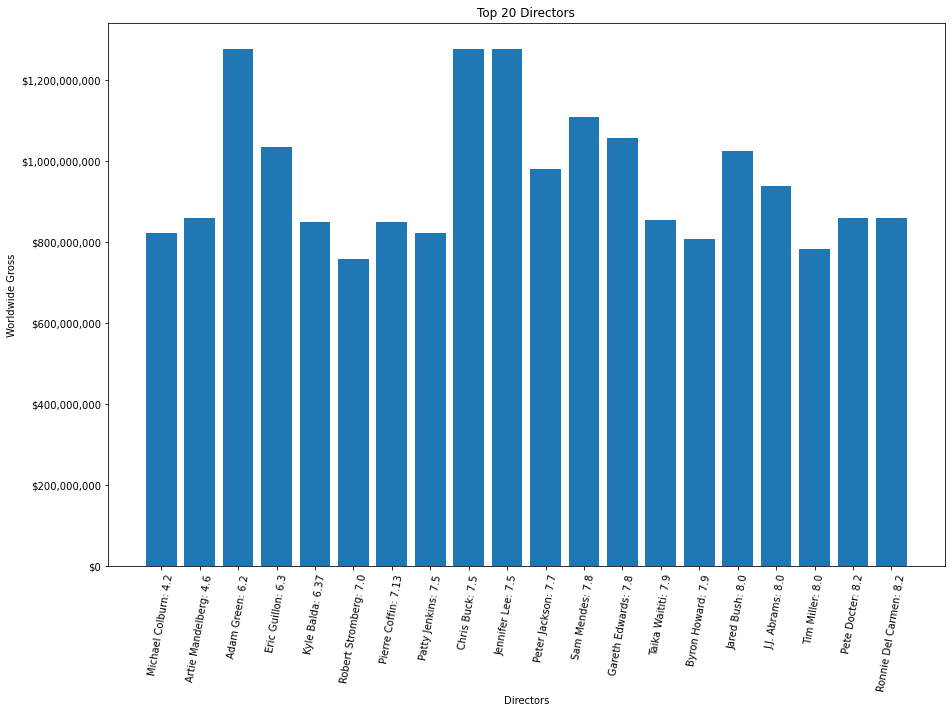

In [149]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(names_with_rat,gross_rounded)
ax.set_xticklabels(names_with_rat, rotation=80)
ax.set_yticklabels(y_lables)

# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_title('Top 20 Directors')
ax.set_xlabel('Directors')
ax.set_ylabel('Worldwide Gross');


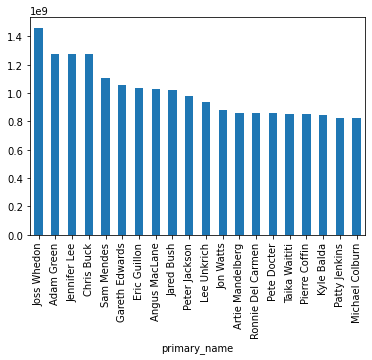

In [28]:
top_20_dir.sort_values(ascending=False)[:20].plot(kind='bar');

In [5]:
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
rt_movies_df.synopsis.isna().value_counts()

False    1498
True       62
Name: synopsis, dtype: int64

In [21]:
test = rt_movies_df.dropna()
len(test)

235

In [65]:
joined = rt_reviews_df.set_index('id').join(rt_movies_df.rename(columns={'rating':'mpa_rating'}).set_index('id'), how='inner')
joined.head()

,review,rating,fresh,critic,top_critic,publisher,date,synopsis,mpa_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


<AxesSubplot:>

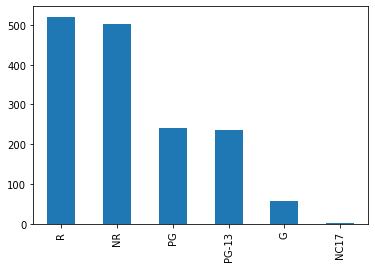

In [79]:
rt_movies_df.rating.value_counts().plot(kind='bar')

In [81]:
rt_movies_df.director.value_counts()[:25]

Steven Spielberg      10
Clint Eastwood         8
Yimou Zhang            4
William Friedkin       4
Alfred Hitchcock       4
William Beaudine       4
Jim Jarmusch           4
Woody Allen            4
Curtis Hanson          4
Bruce Beresford        4
Ridley Scott           4
Barry Levinson         4
Peter Bogdanovich      3
Ang Lee                3
Richard Linklater      3
Neil Jordan            3
Boris Sagal            3
Charles Walters        3
David Lean             3
Fritz Lang             3
Anatole Litvak         3
Sylvester Stallone     3
Werner Herzog          3
George Sidney          3
Joseph Ruben           3
Name: director, dtype: int64

In [84]:
group_dir = rt_movies_df.set_index('director').groupby('director')
group_dir.head()

,id,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio
director,,,,,,,,,,,
William Friedkin,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
David Cronenberg,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
Allison Anders,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
Barry Levinson,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
Rodney Bennett,7,NaN,NR,Drama|Romance,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
James Lapine,1993,A former child actor turned talent agent is hi...,PG,Comedy,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
Barry Sonnenfeld,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
Steve Barron,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [85]:
rt_movies_df.box_office.value_counts()

200,000       2
20,900,803    2
600,000       2
32,000,000    2
793,352       1
             ..
19,755,422    1
410,077       1
2,027,042     1
14,443,077    1
43,800,000    1
Name: box_office, Length: 336, dtype: int64

In [88]:
dropped = rt_movies_df.dropna('box_office')
# dropped.box_office.value_counts()

ValueError: No axis named box_office for object type DataFrame

In [ ]:
# Legend
green_patch = mpatches.Patch(color='green', label='Top 10 in both Rating and Worldwide Gross')
plt.legend(handles=[green_patch], prop={'size': 38}, loc='upper right')
# footnote
bbox_ = {"facecolor":"orange", "alpha":0.5, "pad":5}
plt.figtext(0.05, 0.05, "Most expesive movie ever made: $425 Billion per The Numbers", ha="left", fontsize=40, bbox=bbox_)